<a href="https://colab.research.google.com/github/endiesworld/2110ACDS_T7_C_Predict/blob/main/2110ACDS_T7_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

{**2110ACDS_T7**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


  

<h2><center> Climate Change Belief Analysis</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?id=1Z13NCj2wU-2-EAB293IGSJkOjXkknzrO" width = "800" height = '500'/>

*Introduction*
<p align = "justify">Climate change is the global phenomenon of climate transformation characterized by the changes in the usual climate of the planet (regarding temperature, precipitation, and wind) that are especially caused by human activities. As a result of unbalancing the weather of Earth, the sustainability of the planet’s ecosystems is under threat, as well as the future of humankind and the estability of the global economy.


*About the problem*
<p align = "justify">In order to mitigate the risks associated with climate change our clients are building around lessening their environmental impact or carbon footprint by offering products and services that are environmental friendly and sustainable. In order to achieve this, they need to determine people's perceptions towards climate change, whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received, which will increasing their insights and informing future marketing strategies.

*Objective*
<p align = "justify"> SWAT Consultancy has been tasked with creation of a Sentiment Analysis model that will be able to classify whether or not a person believes in climate change, based on their novel tweet data.

*Process*
<p align = "justify"> In order to achieve this objective the team will follow the process below:-

1. analyse the supplied data, identify potential errors in the data and clean the existing data set;

2. determine if additional features can be added to enrich the data set;

3. build a model that is capable of forecasting the three hourly demand shortfalls;

4. evaluate the accuracy of the best machine learning model;

5. determine if a person believes in climate change or not, and

6. explain the inner working of the model to a non-technical audience.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Libraries for assessing model accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

###2.1 Brief description of the data

>The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

>>*Class Description*

>>>2 News: the tweet links to factual news about climate change

>>>1 Pro: the tweet supports the belief of man-made climate change

>>>0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

>>>-1 Anti: the tweet does not believe in man-made climate change

>>*Variable definitions*

>>>sentiment: Sentiment of tweet

>>>message: Tweet body

>>>tweetid: Twitter unique id

In [2]:
# load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('sample_submission.csv')

# Preview train dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
# Preview train dataset
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [4]:
# Preview train dataset
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In this section train, test and samplesubmission data have been uploaded to have a snap shot of how the data looks like. The train data will be used to train the model and the test data will be used to test the accuracy of the model in predicting unseen data. The sample submission file will aid in uploading the model in Kaggle.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Exploratory Data Analysis
>*What is Exploratory data analysis?*

>Exploratory data analysis (EDA) is the process of analysing and investigating data sets and summarizing their main characteristics, often employing both non-graphical and graphical methods. 

>*Why is conducting EDA important?*

>It aids in determining how best to manipulate data to get the required answers, expose trends, patterns, and relationships that are not readily apparent i.e. get insights into the dataset.

>*How is EDA conducted?*

>EDA can be conducted in the following ways:
- **Univariate**:- \
    i. **non-graphical**:- This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.\
    ii. **graphical**:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.
- Multivariate:-  \
    i. **non-graphical**:- Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics. \
    ii. **graphical**:- Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

### 3.2 Univariate Non-Graphical Analysis
>For this analysis, we are going to view dataset on the below checks:  \
    >>i.  Check for the presence of *null* values  \
    >>ii. Descriptive statistical values *mean, std, minimum, quatiles, maximum, and kurtosis*  
    >>iii. Dataset data types

In [5]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


>The dataset has 3 features namely sentiment, message, tweetid. The features have 15819 entries and they have no missing values. The message feature has an object datetype i.e. that the features has mixed data types(numbers and strings).  

In [6]:
# look at data statistics
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

>This confirms that the dataset features have no missing values.

 **Descriptive Statistics**

>Descriptive statistics summarize the data by computing mean, median, mode, standard deviation likewise.descriptive statistics describe the dataset in a way simpler manner through;

*   The measure of central tendency 
>*  Mean:- The average value 
>*  Median:- The mid point value 
>*  Mode:- The most common value

*   Measure of spread  
>* Percentiles:- Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.
>* standard deviation:-a number that describes how spread out the values are.
*  Measure of symmetry 
>* Skewness:- a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
>>* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
>>* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
>>* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. 
*  Measure of Peakedness 
>* Kurtosis:-  a measure of relative peakedness of a probability distribution, or alternatively how heavy or how light its tails are. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad).
>>








In [8]:
# look at data statistics
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sentiment,15819.0,NaN,NaN,NaN,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
message,15819,14229,RT @StephenSchlegel: she's thinking about how ...,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tweetid,15819.0,NaN,NaN,NaN,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [9]:
df_train.kurtosis()

sentiment    0.122976
tweetid     -1.193356
dtype: float64

>From the above analysis thus far, it is evidence that we only have two numeric colunms. 
However we suspect that one of these columns(tweetid) contains unique values in each row, while the other column(sentiment) from the name, we infere that it is our label, hence contains a minimum of two different values.

>To confirm the above, we write a function that takes in a dataframe and a column-id, to give an output which is the number of unique values in the column as an integer.

In [10]:
def unique_val(df, col):
    """
        This function takes in a dataframe and a column name, 
        and ouputs an interger, which is the number of unique 
        values in the column.
    """
    return df[col].nunique()

In [11]:
# Check the numbers of unique values for the sentiment column
print(f'The numbers of unique values in the sentiment column is : {unique_val(df_train, "sentiment")}')

The numbers of unique values in the sentiment column is : 4


In [12]:
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

>From the codes above the sentiment feature has four unique values. Most observations are pro climate change indicated by 1. There is also an indication of class imbalance i.e. the number of observations across the classes(1,2,0,-1) is unevenly distributed.

###3.3 Univariate graphical inspection of data
>For this analysis, we view the individual colunms using histogram plot.

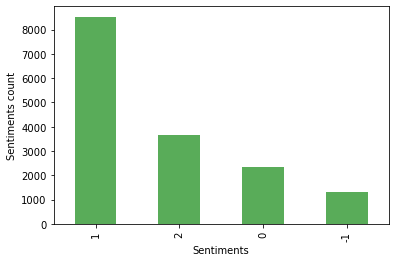

In [ ]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_train['sentiment'].value_counts().plot(kind = 'bar', facecolor='g', alpha=0.65)
ax.set_xlabel('Sentiments')
ax.set_ylabel('Sentiments count')
plt.show()

###3.4 Put in Word Cloud Below

(-0.5, 399.5, 199.5, -0.5)

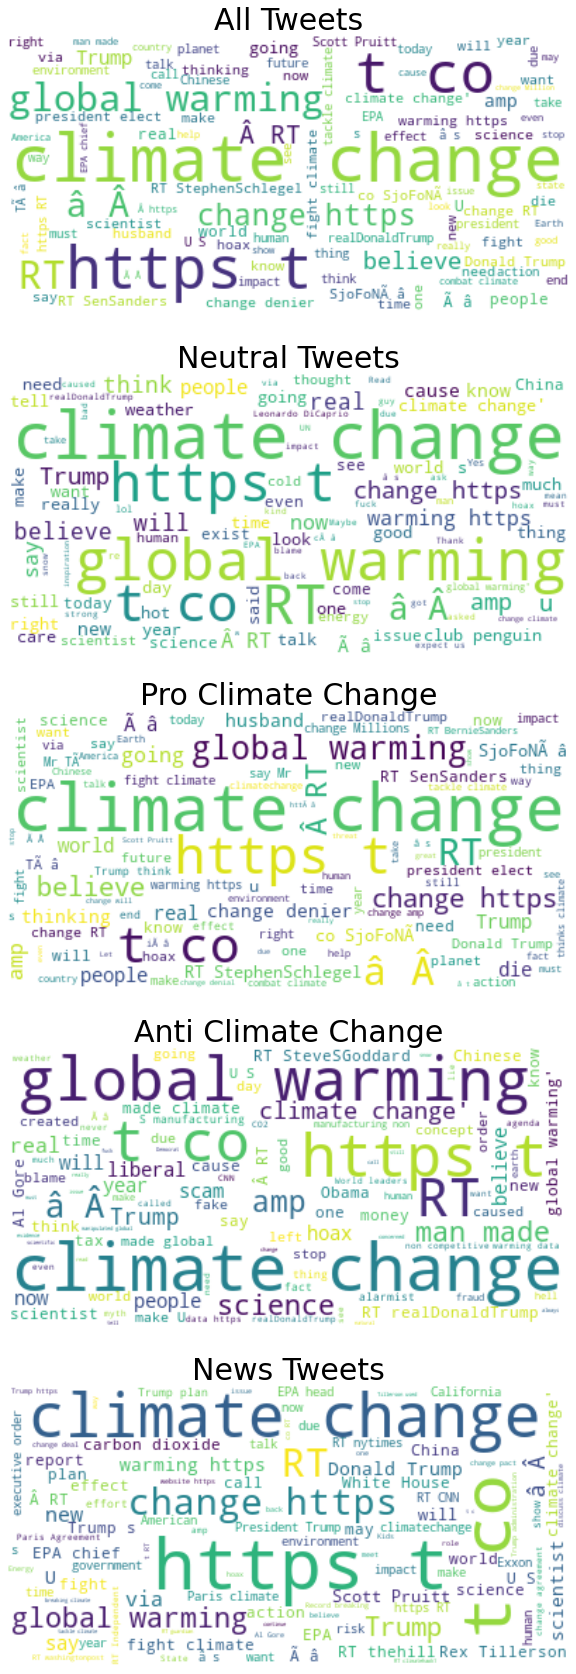

In [ ]:
# Create DataFrame for Each Sentiment
df_sent1 = df_train[df_train['sentiment']==1]
df_sent0 = df_train[df_train['sentiment']==0]
df_sentneg = df_train[df_train['sentiment']==-1]
df_sent2 = df_train[df_train['sentiment']==2]

tweet_All = " ".join(review for review in df_train.message)
tweet_sent0 = " ".join(review for review in df_sent0.message)
tweet_sent1 = " ".join(review for review in df_sent1.message)
tweet_sentneg = " ".join(review for review in df_sentneg.message)
tweet_sent2 = " ".join(review for review in df_sent2.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_sent0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent0)
wordcloud_sent1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent1)
wordcloud_sentneg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sentneg)
wordcloud_sent2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_sent0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sent1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_sentneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_sent2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=30)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

Important Takeaways:

- Words like climate change and global warming that appear in all categories. They are general words that are associated with conversations about climate change.
- The removal of words that appear in all categories and stopwords is likely to have no effect on the performance of the classification model.
- There is a need to reduce the categories in sentiment feature because the goal is to define whethere there is a positive sentiment or not.

###3.5 Key Insights from EDA 
>* The tweets contain punctuation marks and web urls.
>* The tweet text is in mixed case version i.e. both lower and uppercase.
>* The dataset contains three columns (sentiments, message and tweetid)
>* Sentiments and tweetid are of numeric data type, while message is non-numeric
>*Tweetid is a column with uniques values across the entire rows of the dataset
>* Sentiments columns contains for different unique class (-1, 0, 1 &2) with different sizes.
>* The is uneven distribution of observations among the classes in the sentiment column.

###3.6 What's next?
Based on the insights from EDA the text preprocessing will be executed in the data engineering section. Text preprocessing will be done as follows:-
>* Text cleaning
>* Tokenization
>* Stemming
>* Lemmatization
>* Bag of words

In [13]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

###4.1 Text Cleaning

####4.1.1 Removing Noise

>The real world data contains irrelevant or meaningless data termed as noise which can significantly affect various data
analysis tasks of machine learning are classification, clustering and association analysis.Therefore, by removing noise, only the necessary data for analysis is left. For the given dataset, we identified that the *message* column contains the novel tweet for each userid, which we are espected to classify. 
For us to proceed we have to carry out cleaning on this messages. This cleaning will be achieved through:
* identify and remove web-urls from the main message 
* idendify and remove words started with '#'
* idendify and remove words started with '@'
* making everything lower case
* removing punctuation



##### 4.1.1.1 Remove web-url from message

>In removing web_url we use regular expressions.Regular Expressions, also known as “regex” or “regexp”, are used to match strings of text such as particular characters, words, or patterns of characters. They aid in matching and extracting any string pattern from the text.

>We write a function called *delete_url* that uses regex to identify web-url in a column and remove same from the column.

In [ ]:
def delete_url(data, col):
    """
        Accepts a dataframe and col., removes web urls from the col.
        returns a new dataframe 
    """
    df = data.copy()
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ''
    df[col] = df[col].replace(to_replace = pattern_url, value = subs_url, regex = True)
    return df

In [ ]:
# Create a new dataframe with message colun void of url links
new_df_train = delete_url(df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
# Confirm that the above operation was successful 
new_df_train['message'][0]

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!?  via @mashable"

In [ ]:
df_train['message'][0]

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

##### 4.1.1.2 Remove '#' and '@' words

>We write a function *delete_tags*, to identify and remove words started with '#' and '@' using regex.

In [ ]:
def delete_tags(data, col):
    """
        This function takes in a dataframe and a col, removes all words started with '#' and '@' in the column,
        and returns a new dataframe
    """
    df = data.copy()
    pattern_tags = r'#\w+[#?]'
    pattern_2 = r'@\w+'
    subs_tag = ''
    df[col] = df[col].replace(to_replace = pattern_tags, value = subs_tag, regex = True)
    df[col] = df[col].replace(to_replace = pattern_2, value = subs_tag, regex = True)
    return df

In [ ]:
# Create a new dataframe with message column void of url links
new_df_train = delete_tags(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT : Researchers say we have three years to ac...,698562
3,1,WIRED : 2016 was a pivotal year in the war on...,573736
4,1,"RT : It's 2016, and a racist, sexist, climate ...",466954


##### 4.1.1.3 Convert capitalized words to lowercase words

>We write a function *word_converter* to convert capitalized words to lowercase words using the string method .lower().

In [ ]:
def word_converter(data, col):
    """
        This function takes in a dataframe and col, converts all capitalized words in the column to lowercase,
        and returns a new dataframe.
    """
    df = data.copy()
    df[col] = df[col].str.lower()
    return df

In [ ]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_train = word_converter(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt : researchers say we have three years to ac...,698562
3,1,wired : 2016 was a pivotal year in the war on...,573736
4,1,"rt : it's 2016, and a racist, sexist, climate ...",466954


##### 4.1.1.4 Remove punctuation

>We write a function *remove_punc* that uses the string package from python to remove punctions.

In [ ]:
def remove_punc(data, col):
    """
        This function takes in a dataframe and a column, uses python string package to identify and remove all
        punctions in the column. It returns a new dataframe
    """
    def operation(post):
        return ''.join([l for l in post if l not in string.punctuation])
    
    df = data.copy()
    
    df[col] = df[col].apply(operation)
    return df

In [ ]:
# Create a new dataframe with the message colmn void of punctuations
new_df_train = remove_punc(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,wired 2016 was a pivotal year in the war on ...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


###4.2 Tokenisation
>Tokenization refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.
We write a function *tokenizer* to tokenize the words in the message column and store same in a new column named *message_tok*

In [ ]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df['message_tok'] = df[col].apply(tokeniser.tokenize)
    return df

In [ ]:
# Create a new column to hold the tokens from message column
new_df_train = tokenizer(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid,message_tok
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ..."
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat..."


### 4.3 Stemming
>Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language.

>We write a function *stem_words* to transform all words in the *message_tok* column to its root form.

In [ ]:
def stem_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of SnowballStemmer class from the nltk package.
        Returns a new dataframe with an additional column "message_stem"
    """
    stemmer = SnowballStemmer('english')
    def operation(words, stemmer):
        return [stemmer.stem(word) for word in words]
    
    df = data.copy()
    df["message_stem"] = df[col].apply(operation, args=(stemmer, ))
    
    return df

In [ ]:
# Create a new column to hold root words from stemmer
new_df_train = stem_words(new_df_train, 'message_tok')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war..."
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,..."


### 4.4 Lemmatization
>Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

>We write a function *lam_words* to transform all words in the *message_tok* column to its root form using Lemmatization, to enable us acrter for the shortfall in stemming above.

In [ ]:
def lam_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of WordNetLemmatizer class from the nltk package.
        Returns a new dataframe with an additional column "message_lam"
    """
    lemmatizer = WordNetLemmatizer()
    def operation(words, lemmatizer):
        return [lemmatizer.lemmatize(word) for word in words] 
    df = data.copy()
    df["message_lam"] = df[col].apply(operation, args=(lemmatizer, ))
    
    return df

In [ ]:
# Create a new column to hold root words from stemmer
new_df_train = lam_words(new_df_train, 'message_stem')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, we, have, three, year, to,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,..."
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, it, 2016, and, a, racist, sexist, climat,..."


### 4.5 Remove stop words here
>Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. The stop words are removed using the stop words dictionary in the nltk library.

>We use the *remove_stop_words* function.

In [ ]:
def remove_stop_words(tokens):
    """Takes in tokens and returns token without stopwords"""

    return [t for t in tokens if t not in stopwords.words('english')]

In [ ]:
new_df_train['message_no_stop'] = new_df_train['message_lam'].apply(lambda x: remove_stop_words(x))
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,message_no_stop
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]"
2,2,rt researchers say we have three years to act...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, three, year, act, climat, ..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,...","[wire, 2016, wa, pivot, year, war, climat, chang]"
4,1,rt its 2016 and a racist sexist climate chang...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, 2016, racist, sexist, climat, chang, deni..."


### 4.6 Bag of Words

>Bag of Words (BOW) is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

>The objective is to extract features into a format that can be applied to a classifier. NLTK classifier expect dict style features. Therefore, transforming our text into dict type is mandatory.

In [ ]:
# Function to count words
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [ ]:
sentiment_labels = list(df_train.sentiment.unique())
print(sentiment_labels)

[1, 2, 0, -1]


>In the following cells, we create dictionaries for each type of sentiment.

In [ ]:
sentiment = {}
for sent in sentiment_labels:
    df = new_df_train.groupby('sentiment')
    sentiment[sent] = {}
    for row in df.get_group(sent)['message_no_stop']:
        sentiment[sent] = bag_of_words_count(row, sentiment[sent]) 

>Create a list of all the unique words

In [ ]:
all_words = set()
for sent in sentiment_labels:
    for word in sentiment[sent]:
        all_words.add(word)

>Creating a combined dictionary for all the words in the message

In [ ]:
sentiment['all'] = {}
for sent in sentiment_labels:    
    for word in all_words:
        if word in sentiment[sent].keys():
            if word in sentiment['all']:
                sentiment['all'][word] += sentiment[sent][word]
            else:
                sentiment['all'][word] = sentiment[sent][word]

>Check the total number of words for confirmation

In [ ]:
total_words = sum([v for v in sentiment['all'].values()])
total_words

175898

>Check the distribution of word that appear less than 10 times in the text.

Text(0.5, 0, 'word frequency')

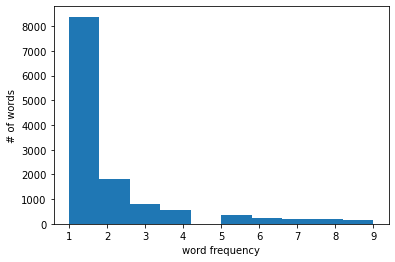

In [ ]:
_ = plt.hist([v for v in sentiment['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

>The number of words that appear once are very many.We can check the total number below. 

In [ ]:
len([v for v in sentiment['all'].values() if v == 1])

8387

>A print out of the rare words just to get an idea of what they entail

In [ ]:
rare_words = [k for k, v in sentiment['all'].items() if v==1] 
print(rare_words[:100])

['theyz', 'noneconom', '24hoursofreality…', 'ferber', 'whileã¢â‚¬â¦', 'denigr', 'heel', 'deniersaca', 'beaumont', 'movementã¢â‚¬â¦', 'francesca', 'lmk', 'bookbind', 'distil', 'stops', 'twostep', 'boingbo', 'gandhi', 'deut', 'antartica', 'portugues', 'atm', 'jail', 'cleangreennew', 'lob', 'automobil', 'gunreform🔫', 'yap', 'ã¢â‚¬å“acceler', 'kerry…', 'claus…', 'tooantibiot', 'hmu', 'makeclimatematter…', 'solnit', 'epitom', 'baptcarecommun', 'hearten', 'paymenã¢â‚¬â¦', 'corrupti…', 'chem', 'cicada', 'gen…', 'nhlamemb', 'standindivis', 'nutrit', 'papa', 'bryton', 'had…', 'goto', 'athen', 'environmental…', 'willburn', 'viz…', 'digg', 'calexit', 'springer', 'defo', 'everyã¢â‚¬â¦', 'ã¢â‚¬â€\x9dpotus', 'newsfromunderground', 'centrism', 'midsumm', 'fpm', 'changebrut', 'terrif', 'settng', '19b', 'politiciansscientist', 'libcrib', 'lowcarbonusa', 'pretenc', 'generat…', 'salut', 'ago…', 'sizzel', 'shel', 'tur…', 'intensif', 'crb', 'una', 'slay', 'falling”', 'staff…', 'look…', 'envirin', '😢silenci

>NB: It is clear that some of the words in the list do not make sense. 

>Recommend the use of count vectorizer from sklearn to prepare the message column before passing into a model. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(df_train['message'])

CountVectorizer()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### 5.1 Models used
>1. Logistic Regression

#### 5.1.1 Logistic Regression

>Logistic regression is commonly utilized When there are two possible outcomes in a classification task. The model estimates the probability of the first class, which assesses the connection between the dependent variable (label) and one or more independent variables (our features).

In [ ]:
# Make a copy of the train DataFrame to test pre_precessing vs non pre-processing
with_pre_processing = df_train.copy()
without_pre_processing = df_train.copy()

In [ ]:
# Declaring the X and y variables

# Without Pre-processing
X = without_pre_processing['message']
y = without_pre_processing['sentiment']

# With Pre-processing
X_ = with_pre_processing['message']
y_ = with_pre_processing['sentiment']

In [ ]:
# Without Pre-processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# With Pre-processing
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.25, random_state = 42)

In [ ]:
# Setting up tfidf vectorizer
tfidf_v = TfidfVectorizer(ngram_range = (1, 2), min_df = 2, max_df = 0.8)

In [ ]:
# Without Pre-processing
lreg_ = Pipeline([
    ('tfidf', tfidf_v), 
    ('lreg', LogisticRegression())
])

# With Pre-processing
lreg_p = Pipeline([
    ('tfidf', tfidf_v), 
    ('lreg_pre', LogisticRegression())
])

In [ ]:
# split data
lreg_.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('lreg', LogisticRegression())])

In [ ]:
# Without Pre-processing
lreg_y = lreg_.predict(X_test)

In [ ]:
# With Pre-processing
# Fit models
lreg_p.fit(X_train_, y_train_)

# Predict
lreg_yp = lreg_p.predict(X_test_)

In [ ]:
# Without Pre-processing
metrics_without_preprocessing = {
    'precision': [
        precision_score(y_test, lreg_y, average = 'weighted')
    ],
    'recall': [
        recall_score(y_test, lreg_y, average = 'weighted')
    ],
    'f1': [
        f1_score(y_test, lreg_y, average = 'weighted')
    ]
}

In [ ]:
# With Pre-processing
metrics_pre_processing = {
    'precision': [
        precision_score(y_test_, lreg_yp, average = 'weighted')
    ],
    'recall': [
        recall_score(y_test_, lreg_yp, average = 'weighted')
    ],
    'f1': [
        f1_score(y_test_, lreg_yp, average = 'weighted')
    ]
}

In [ ]:
no_preprocess = pd.DataFrame(metrics_without_preprocessing, index = [
    'Logistic Regression'])

with_preprocess = pd.DataFrame(metrics_pre_processing, index = [
    'Logistic Regression'])

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
print('\t\tNo Preprocessing\t\t\t\t\tPreprocessing')
display_side_by_side(no_preprocess, with_preprocess)

		No Preprocessing					Preprocessing


,precision,recall,f1
Logistic Regression,0.748897,0.749178,0.728501
,precision,recall,f1
Logistic Regression,0.748897,0.749178,0.728501


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic